# **Laboratorio bono 2**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Santiago Rodríguez Quiroga
2.   David Tobón Molina

**Número del grupo**

Grupo 2

# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, las cuales permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas a partir de teoría de robótica. Calcular estas variables se logra al medir inicialmente la aceleración de un cuerpo través del análisis de video o a través del uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmene estimar la aceleración. Es fundamental tener mediciones de señales de posición que no tienen variaciones demasiado rápidas debido al ruido para realizar un análisis preciso. 



# **Descripción de la práctica**

En esta práctica se desea limpiar la señal de posición vertical y horizontal medida en un codo al abrir y cerrar una puerta, como se muestra en el siguiente esquema, de tal manera que queden listas para calcular eventualmente la aceleración:

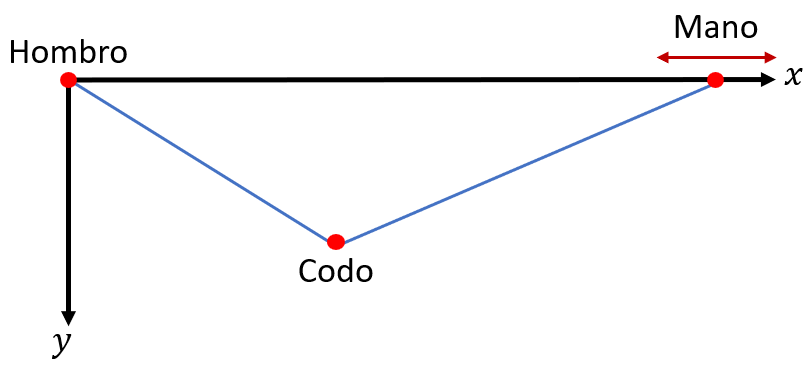

Para esto, se registró la posición tanto vertical como horizontal en el tiempo a través de la ubicación de un marcador en el codo y la grabación con el celular de una persona abriendo y cerrando la puerta manteniendo la mano a la misma altura del hombro. Estas dos variables (posición vertical y horizontal) se presentan en un archivo excel junto al arreglo asociado al tiempo. El objetivo de este laboratorio es: filtrar las señales de posición para después encontrar polinomios que mejor se ajusten a cada variable. Para esto, tenga en cuenta lo siguiente: \

**Filtrado:**

En el laboratorio anterior se implementó un filtro basado en la minimización de la energía de la derivada de una señal utilizando la matriz de derivadas $D$ definida a partir de la derivada de primer orden:

\begin{align*}
Δ_x(k) = x(k+1) - x(k)
\end{align*}

Note que los coeficientes de los términos son [1 -1] respectivamente, esta es la razón por la que la matriz $D$ posee la forma:

\begin{align*}
D = \begin{bmatrix}
1 & -1 &   &   &  \\
  & 1 & -1 &   & \\
  &   & & \ddots & \\
&  &  & 1 & -1\\
\end{bmatrix}
\end{align*}

Esta derivada de primer orden también puede ser entendida como la velocidad o tasa de cambio de la señal. Sin embargo, como se mencionó en el contexto del problema, se busca calcular aceleraciones. Un filtro más adecuado para este caso es uno basado en la energía de la aceleración, es decir, que siga la siguiente ecuación en diferencias:

\begin{align*}
Δ^2_x(k) = Δ_x(k) - Δ_x(k-1)
\end{align*}

Es decir, la matriz $D$ debe cambiar para ahora calcular la diferencia de las derivadas.

**Ajuste polinomial**
En un laboratorio anterior se ajustó una recta con respecto a datos experimentales a partir de la regresión lineal usando mínimos cuadrados. Sin embargo, en este laboratorio es necesario incrementar el grado del polinomio de la siguiente forma:
\begin{align*}
P_n(t) = \sum_{i=0}^{n} β_it^{i}
\end{align*}

Donde $n$ es el grado del polinomio, $\beta_i$ son los coeficientes del polinomio y $t$ es la variable del tiempo. 

Para llevar a cabo el objetivo, siga los siguientes pasos:



1. Defina una función que permita constuir la matriz $D$ ahora teniendo en cuenta las diferencias de las derivadas. Esta función debe recibir como parámetro el número de datos y debe retornar la matriz $D$.

In [49]:
"""
D1: matriz D de primeras derivadas
D2: matriz D de segundas derivadas
"""

'\nD1: matriz D de primeras derivadas\nD2: matriz D de segundas derivadas\n'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c = [10, 100, 1000, 10000]

elbow_data = pd.read_excel("data_bono_2.xlsx", header=None)
time = np.array(elbow_data[0][1:])
x_elbow = np.array(elbow_data[1][1:])
y_elbow = np.array(elbow_data[2][1:])

def reg_dmatrix_D2(data, time):

    d_matrix = np.zeros((len(time)-2,len(time)))

    for i in range(len(time)-2):
            d_matrix[i][i] = 1
            d_matrix[i][i+1] = -2
            d_matrix[i][i+2] = 1

    return d_matrix

D2 = reg_dmatrix_D2(x_elbow, time)
print(D2.shape)
print(D2)

(379, 381)
[[ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]]


2. Construya una función que permita filtrar la señal usando la función anterior para la construcción de la matriz $D$, a esta nueva función le debe entrar como parámetro la señal a filtrar y el parámetro $c$ y debe retornar la señal filtrada.

In [51]:
def x_star(data, c, d):
    identity = np.identity(len(data))
    dt = d.transpose()
    dtd= dt.dot(d)
    m_to_inv = identity+(c*dtd)
    x = np.linalg.inv(m_to_inv)@data
    return x, m_to_inv

3. Teniendo en cuenta los datos en excel, filtre la posición tanto horizontal como vertical minimizando la energía de la segunda derivada (es decir, la energía de las diferencias de las derivadas). Haga un gráfico donde comparan los datos crudos y filtrados para la posición horizontal en el tiempo. El segundo gráfico es igual pero para la posición vertical. Realice este procedimiento para varios valores de $c$ e indique el que usted considere mejor. Aquí un "buen"  $c$ es tal que la señal es filtrada sin perder información importante del movimiento.

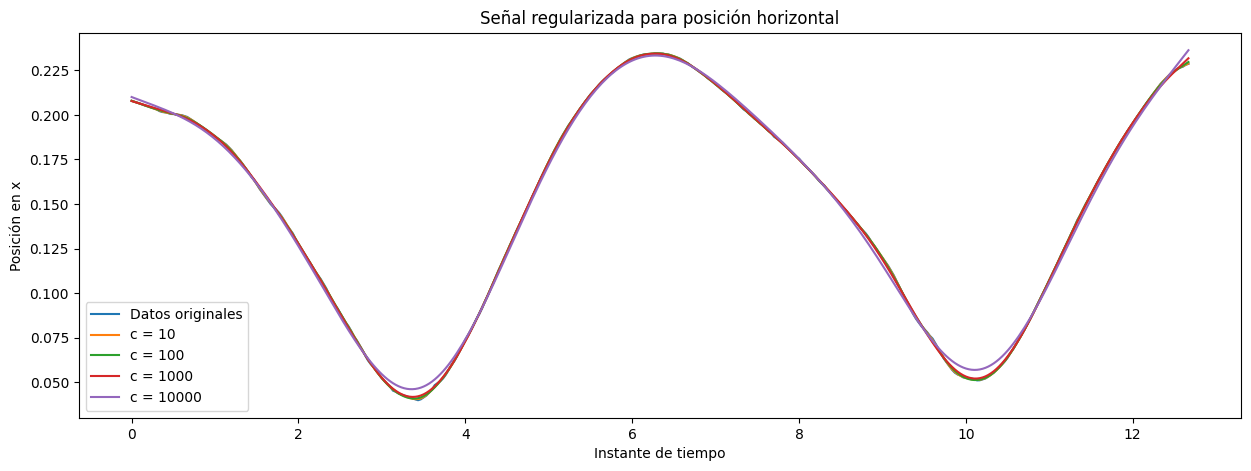

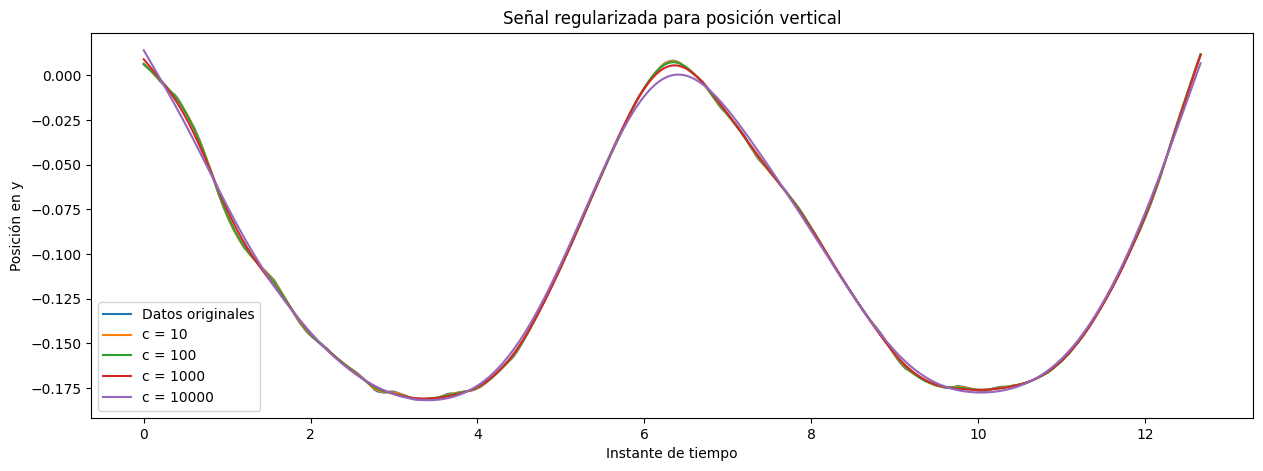

In [52]:
x_stars_D2 = []
y_stars_D2 = []
A_x_D2 = []
A_y_D2 = []
    
# Obtener los valores filtrados y la matriz que se invierte para cada c
for i in range(len(c)):
    x_star_x, pre_inv_x = x_star(x_elbow, c[i], D2)
    x_star_y, pre_inv_y = x_star(y_elbow, c[i], D2)
    x_stars_D2.append(x_star_x)
    y_stars_D2.append(x_star_y)
    A_x_D2.append(pre_inv_x)
    A_y_D2.append(pre_inv_y)

# Graficas de los datos filtrados usando D2 para cada c
plt.figure(figsize=(15, 5))
plt.plot(time, x_elbow, label="Datos originales")
for i in range(len(c)):
    plt.plot(time, x_stars_D2[i], label=f"c = {c[i]}")
plt.title(f"Señal regularizada para posición horizontal")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición en x")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(time, y_elbow, label="Datos originales")
for i in range(len(c)):
    plt.plot(time, y_stars_D2[i], label=f"c = {c[i]}")
plt.title(f"Señal regularizada para posición vertical")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición en y")
plt.legend()
plt.show()

4. Filtre la señal usando la matriz de primeras derivadas y compare la sensibilidad del filtrado al parámetro $c$ con el filtrado anterior.

In [53]:
def reg_dmatrix_D1(data, time):

    d_matrix = np.zeros((len(time)-1,len(time)))

    for i in range(len(time)-1):
            d_matrix[i][i] = 1
            d_matrix[i][i+1] = -1

    return d_matrix

[[ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]


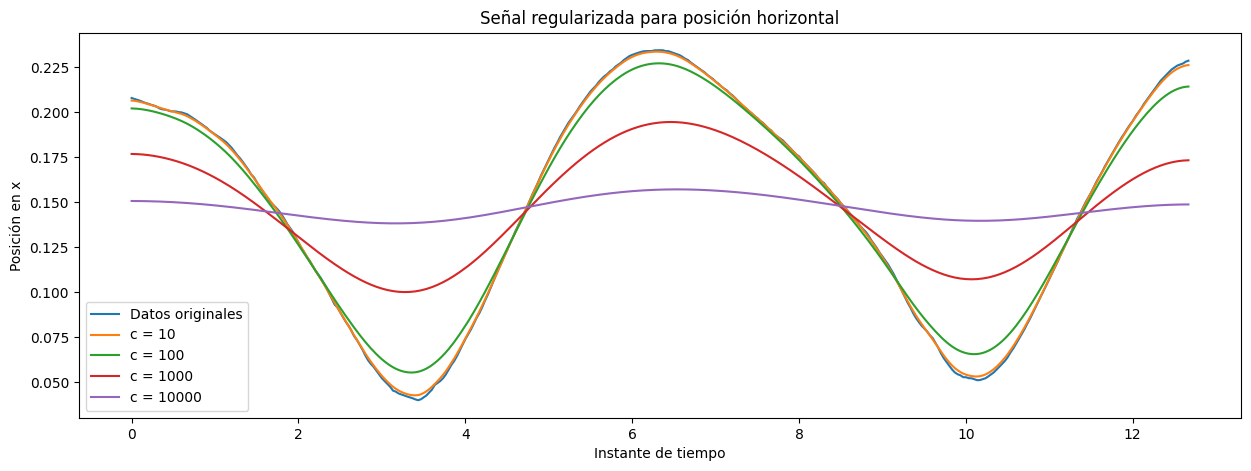

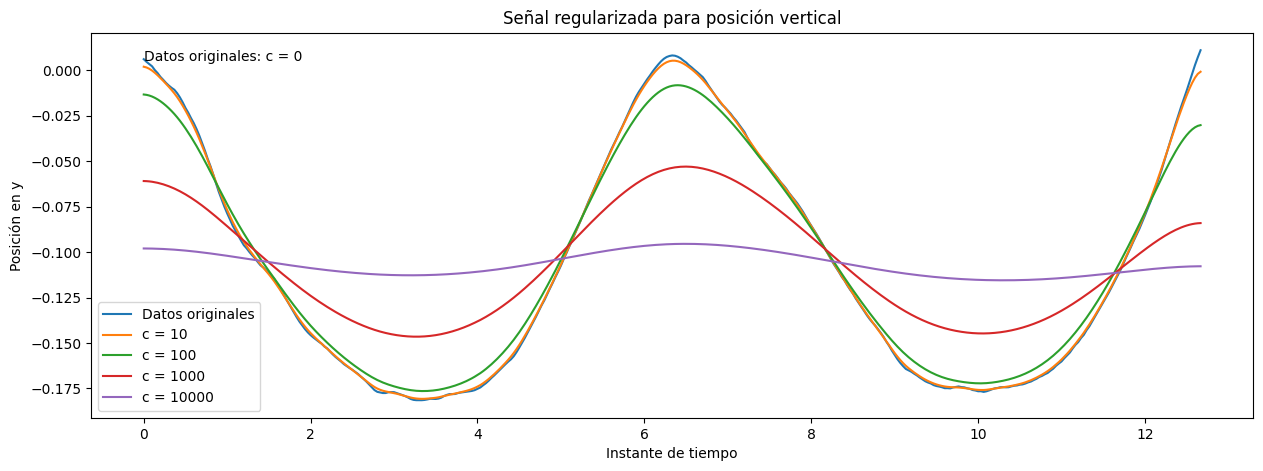

In [54]:
D1 = reg_dmatrix_D1(x_elbow, time)
print(D1)

x_stars_D1 = []
y_stars_D1 = []
A_x_D1 = []
A_y_D1 = []

# Obtener los valores filtrados y la matriz que se invierte para cada c
for i in range(len(c)):
    x_star_x, pre_inv_x = x_star(x_elbow, c[i], D1)
    x_star_y, pre_inv_y = x_star(y_elbow, c[i], D1)
    x_stars_D1.append(x_star_x)
    y_stars_D1.append(x_star_y)
    A_x_D1.append(pre_inv_x)
    A_y_D1.append(pre_inv_y)

# Graficas de los datos filtrados usando D1 para cada c
plt.figure(figsize=(15, 5))
plt.plot(time, x_elbow, label="Datos originales")
for i in range(len(c)):
    plt.plot(time, x_stars_D1[i], label=f"c = {c[i]}")
plt.title(f"Señal regularizada para posición horizontal")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición en x")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(time, y_elbow, label="Datos originales")
for i in range(len(c)):
    plt.plot(time, y_stars_D1[i], label=f"c = {c[i]}")
plt.title(f"Señal regularizada para posición vertical")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición en y")
plt.annotate("Datos originales: c = 0", xy=(min(time), max(y_stars_D1[0])))
plt.legend()
plt.show()

5. Tenga en cuenta que para filtrar la señal hay que invetir una matriz. Teniendo en cuenta la teoría de regularización, la condición de una matriz debería mejorar al regularizar el problema de minimización. Calcule la condición de la matriz que requiere ser invertida para cada uno de los valores de $c$ definidos en el punto 3. Analice el efecto de $c$ sobre la condición de la matriz.

<Figure size 640x480 with 0 Axes>

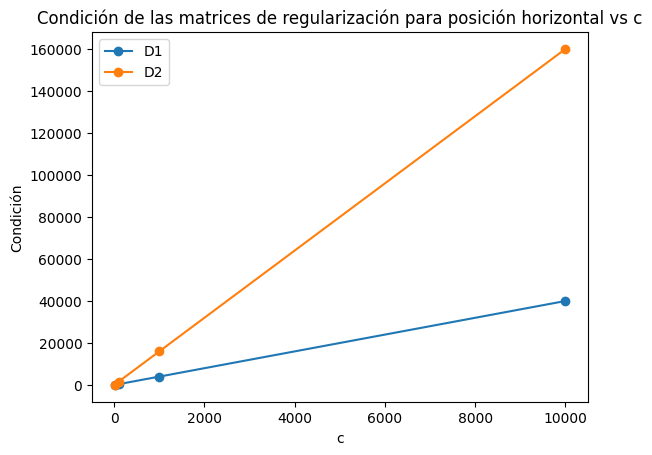

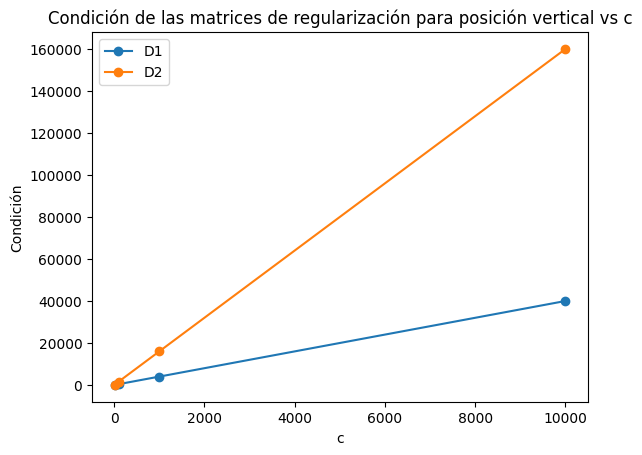

In [55]:
def matrix_condition(A):
    return np.linalg.cond(A, 2)

plt.figure()
conds_x_D1 = []
conds_x_D2 = []
conds_y_D1 = []
conds_y_D2 = []

# Calcular condión de la matriz invertible para el proceso con D1 y D2 para cada c
for i in range(len(c)):
    conds_x_D1.append(matrix_condition(A_x_D1[i]))
    conds_x_D2.append(matrix_condition(A_x_D2[i]))
    conds_y_D1.append(matrix_condition(A_y_D1[i]))
    conds_y_D2.append(matrix_condition(A_y_D2[i]))

# Graficar condiciones de las matrices vs c
plt.figure()
plt.plot(c, conds_x_D1, '-o', label="D1")
plt.plot(c, conds_x_D2, '-o', label="D2")
plt.title("Condición de las matrices de regularización para posición horizontal vs c")
plt.xlabel("c")
plt.ylabel("Condición")
plt.legend()
plt.show()

plt.figure()
plt.plot(c, conds_y_D1, '-o', label="D1")
plt.plot(c, conds_y_D2, '-o', label="D2")
plt.title("Condición de las matrices de regularización para posición vertical vs c")
plt.xlabel("c")
plt.ylabel("Condición")
plt.legend()
plt.show()


6. Construya una función que permita construir la matriz $H$ para regresión polinómica de grado $n$. A esta función le dede entrar como parámetro los datos de la variable independiente en un conjunto de datos y el grado $n$ del polinomio de ajuste. 

In [56]:
def build_H(data, n):
    H = np.zeros((len(data), n+1))
    
    for i in range(len(H)):
        for j in range(len(H[0])):
            H[i][j] = data[i]**j
    return H  

7. Usando los datos filtrados anteriomente, haga una regresión polinómica donde el grado del polinomio lo debe escoger empíricamente minimizando el error cuadrático lo más que se pueda. Luego, en un gráfico, compare los datos crudos, los filtrados, y el polinomio para la posición horizontal. Realice el mismo procedimiento para la posición vertical.

In [57]:
def cuadratic_error(original_data, betas, H):
    error = np.linalg.norm(original_data-np.dot(H,betas))**2
    return error


def get_betas(H, y):
    Ht = H.transpose()
    HtH = Ht.dot(H)
    Hty = Ht.dot(y)
    inv_HtH = np.linalg.inv(HtH)
    return inv_HtH.dot(Hty)

In [58]:

errors_x_D1 = {}
errors_x_D2 = {}
errors_y_D1 = {}
errors_y_D2 = {}
for i in range(len(c)):
    errors_x_D1[c[i]] = []
    errors_x_D2[c[i]] = []
    errors_y_D1[c[i]] = []
    errors_y_D2[c[i]] = []

errors_dict = {}
hoizontal_errors_list = []
vertical_errors_list = []
# Probar con 10 grados de polinomios
n_list = list(range(11))

non_invertible_matrixes = 0
H_matrix_counter = 0
for n in n_list:
    for i in range(len(c)):
        # Calcular matriz H para cada set de datos filtrados con un c dado
        H_x_D1 = build_H(x_stars_D1[i], n)
        H_x_D2 = build_H(x_stars_D2[i], n)
        H_y_D1 = build_H(y_stars_D1[i], n)
        H_y_D2 = build_H(y_stars_D2[i], n)
        H_matrix_counter += 4

        try:
            # Calcular betas óptimos para cada set de datos filtrados con un c dado
            betas_x_D1 = get_betas(H_x_D1, x_stars_D1[i])
            # Calcular errores cuadraticos para cada set de datos filtrados
            error_x_D1 = cuadratic_error(x_elbow, betas_x_D1, H_x_D1)
            # Diccionario para obtener información de los parámetros que resultan en cada valor de error
            errors_dict[f'{error_x_D1}-h'] = f"n = {n}, c = {c[i]}, D = D1"
            # Listas que contiene los errores de las regresiones
            hoizontal_errors_list.append(error_x_D1)
            # Listas para graficar error vs n
            errors_x_D1[c[i]].append(error_x_D1)
        except np.linalg.LinAlgError:
            non_invertible_matrixes += 1
        
        try:
            betas_x_D2 = get_betas(H_x_D2, x_stars_D2[i])
            error_x_D2 = cuadratic_error(x_elbow, betas_x_D2, H_x_D2)
            errors_dict[f'{error_x_D2}-h'] = f"n = {n}, c = {c[i]}, D = D2"
            hoizontal_errors_list.append(error_x_D2)
            errors_x_D2[c[i]].append(error_x_D2)
        except np.linalg.LinAlgError:
            non_invertible_matrixes += 1
        
        try:
            betas_y_D1 = get_betas(H_y_D1, y_stars_D1[i])
            error_y_D1 = cuadratic_error(y_elbow, betas_y_D1, H_y_D1)
            errors_dict[f'{error_y_D1}-v'] = f"n = {n}, c = {c[i]}, D = D1"
            vertical_errors_list.append(error_y_D1)
            errors_y_D1[c[i]].append(error_y_D1)
        except np.linalg.LinAlgError:
            non_invertible_matrixes += 1
        
        try:
            betas_y_D2 = get_betas(H_y_D2, y_stars_D2[i])
            error_y_D2 = cuadratic_error(y_elbow, betas_y_D2, H_y_D2)
            errors_dict[f'{error_y_D2}-v'] = f"n = {n}, c = {c[i]}, D = D2"
            vertical_errors_list.append(error_y_D2)
            errors_y_D2[c[i]].append(error_y_D2)
        except np.linalg.LinAlgError:
            non_invertible_matrixes += 1        


print(f"{non_invertible_matrixes} de {H_matrix_counter} matrices H no eran invertibles")  
  
# Encontrar los errores cuadráticos mínimos para los datos de posición horizontal y vertical
min_horizontal_error = min(hoizontal_errors_list)
min_vertical_error = min(vertical_errors_list)

# Obtener los parámetros que resultan en el error cuadrático mínimo
print(f"El error cuadrático mínimo para la regresión de los datos horizontales es {min_horizontal_error}, obtenido con:\n{errors_dict[str(min_horizontal_error)+'-h']}")
print(f"El error cuadrático mínimo para la regresión de los datos verticales es {min_vertical_error}, obtenido con:\n{errors_dict[str(min_vertical_error)+'-v']}")      

1 de 176 matrices H no eran invertibles
El error cuadrático mínimo para la regresión de los datos horizontales es 1.6658392218462324e-05, obtenido con:
n = 7, c = 10, D = D2
El error cuadrático mínimo para la regresión de los datos verticales es 1.5813094699574015e-05, obtenido con:
n = 9, c = 10, D = D2


In [59]:
def calculate_regresion(H, betas):
    regresion = np.dot(H, betas)
    return regresion

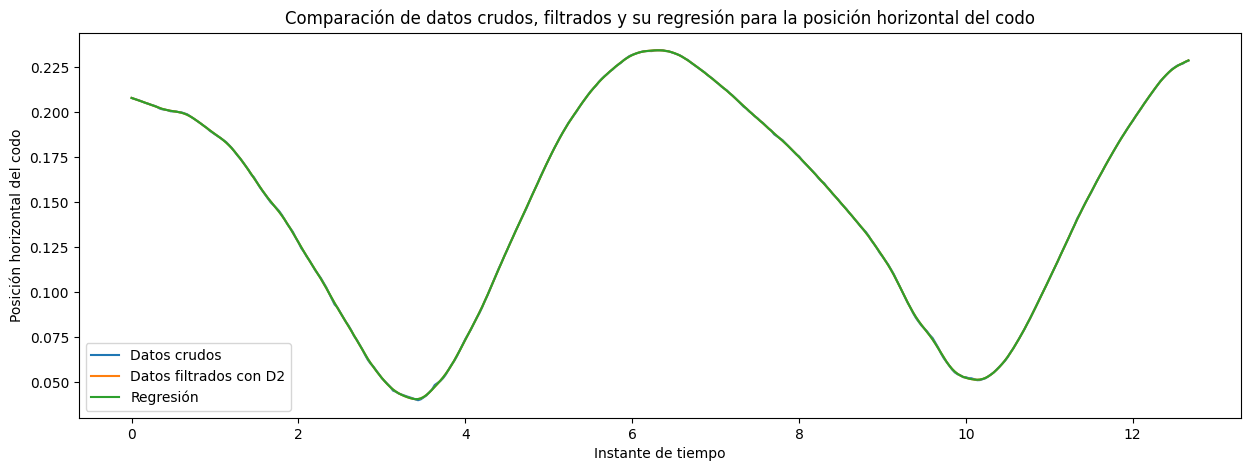

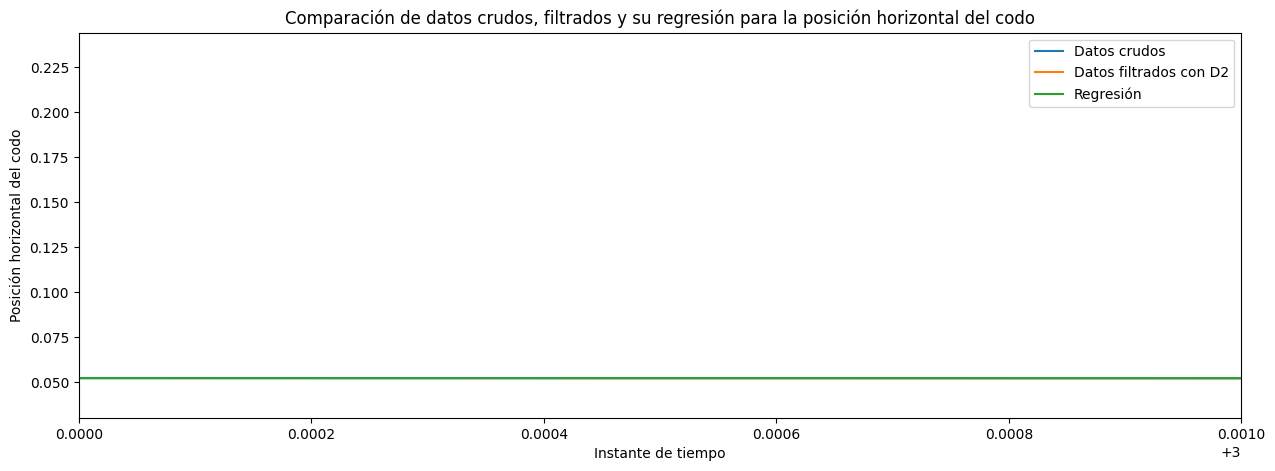

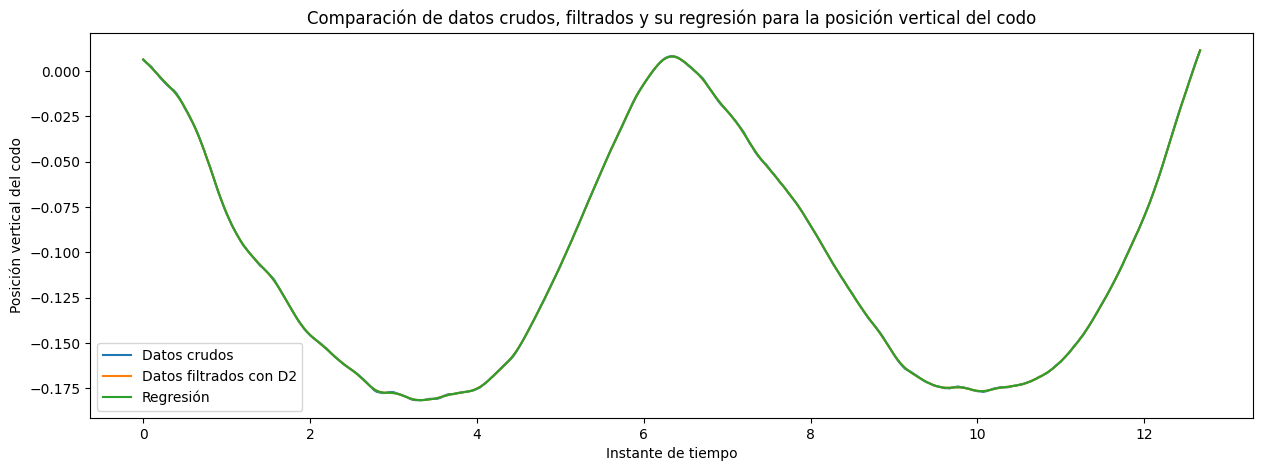

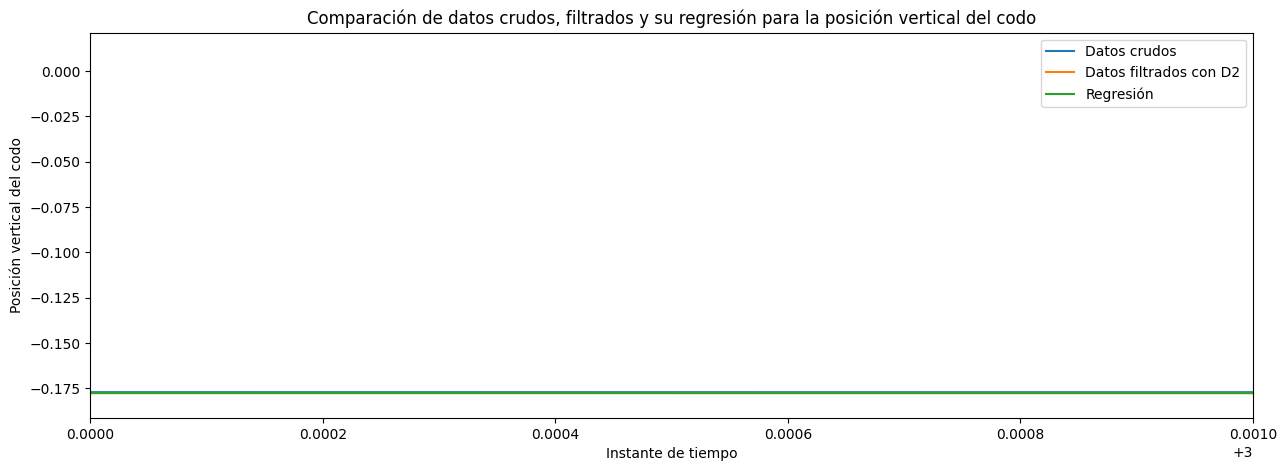

In [60]:
c_i_hor = 0
n_hor = 7
c_i_ver = 0
n_ver = 9

H_hor = build_H(x_stars_D2[c_i_hor], n_hor)
B_hor = get_betas(H_hor, x_stars_D2[c_i_hor])
H_ver = build_H(y_stars_D2[c_i_ver], n_ver)
B_ver = get_betas(H_ver, y_stars_D2[c_i_ver])

horizontal_regresion = calculate_regresion(H_hor, B_hor)
vertical_regresion = calculate_regresion(H_ver, B_ver)

plt.figure(figsize=(15,5))
plt.plot(time, x_elbow, label="Datos crudos")
plt.plot(time, x_stars_D2[c_i_hor], label="Datos filtrados con D2")
plt.plot(time, horizontal_regresion, label="Regresión")
plt.title("Comparación de datos crudos, filtrados y su regresión para la posición horizontal del codo")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición horizontal del codo")
plt.legend()
plt.show()

plt.figure()
plt.plot(time, x_elbow, label="Datos crudos")
plt.plot(time, x_stars_D2[c_i_hor], label="Datos filtrados con D2")
plt.plot(time, horizontal_regresion, label="Regresión")
plt.title("Comparación de datos crudos, filtrados y su regresión para la posición horizontal del codo")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición horizontal del codo")
plt.legend()
plt.xlim([3, 3.001])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(time, y_elbow, label="Datos crudos")
plt.plot(time, y_stars_D2[c_i_ver], label="Datos filtrados con D2")
plt.plot(time, vertical_regresion, label="Regresión")
plt.title("Comparación de datos crudos, filtrados y su regresión para la posición vertical del codo")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición vertical del codo")
plt.legend()
plt.show()

plt.figure()
plt.plot(time, y_elbow, label="Datos crudos")
plt.plot(time, y_stars_D2[c_i_ver], label="Datos filtrados con D2")
plt.plot(time, vertical_regresion, label="Regresión")
plt.title("Comparación de datos crudos, filtrados y su regresión para la posición vertical del codo")
plt.xlabel("Instante de tiempo")
plt.ylabel("Posición vertical del codo")
plt.legend()
plt.xlim([3, 3.001])
plt.show()

8. Responda las siguientes preguntas:
 - ¿Cuál filtro fue mejor teniendo en cuenta el error cuadrático?, desde el punto de vista matemático, ¿por qué sucede esto? (use la información de la condición de una matriz)
 
El mejor filtro fue el realizado con $c=10$ utilizando la matriz de segundas derivadas (_D2_). Esto se puede determinar al calcular y comparar la condición de las matrices a invertir, pues la condición de la matriz (_cond(A)_) sirve como indicador de qué tan bien condicionado está el sistema $Ax = b$.

Cuanto más se acerque _cond(A)_ a 1, se dice que el sistema esta mejor condicionado. Cuando un sistema está bien condicionado, su valor de salida se modifica muy poco cuando hay errores en los valores de entrada, en términos del presente problema: _cond(A)_ mide cuánto cambian los datos filtrados (valores de salida) si se encuentran errores de medición en los datos de entrada.

Consecuentemente, el menor valor de la condición de la matriz se obtuvo para el menor $c$ utilizado. Usualmente, cuando se regularizan los valores de entrada y se aumenta $c$, se encuentra que _cond(A)_ mejora, lo cual no es el caso al filtrar los datos crudos en el presente problema, por ende, se puede concluir que los datos crudos ya estaban bien condicionados y habían pocos errores en su medición.

 - ¿Cómo influyó el parámetro $c$ en el filtro teniendo en cuenta la energía tanto de primera como de segunda derivada?
 - ¿Cuál grado polinómico le dio mejores resultados?, ¿qué pasa cuando el grado es muy bajo y cuando es muy alto?
 - Teniendo en cuenta que se usaron los datos filtrados para construir la regresión, ¿qué hubiera pasado si se usaran los datos crudos?